In [1]:
#Basic Library to be called  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
#To load dataset 'Diabetes'
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#First of all we will check if there is null data in the dataset.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Now we will check datatype of the data inside the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


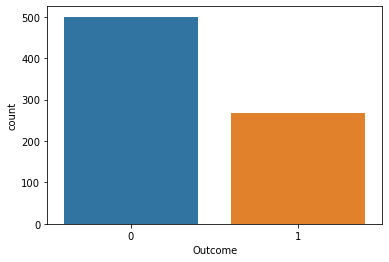

In [7]:
#now we will check which feature is more important for the prediction or dependent variable[outcome] with the help of countplot
sns.countplot(data=df,x='Outcome')
plt.show()

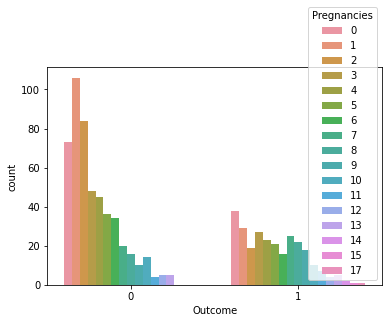

In [8]:
sns.countplot(data=df,x='Outcome',hue='Pregnancies')
plt.show()

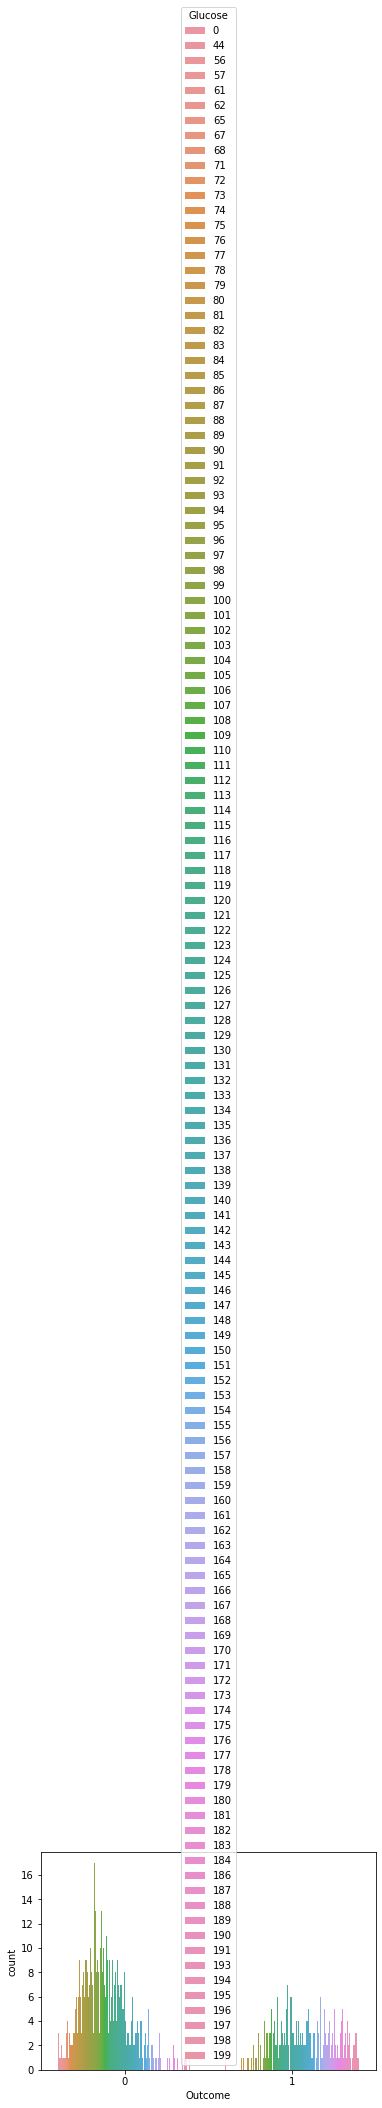

In [9]:
sns.countplot(data=df,x='Outcome',hue='Glucose')
plt.show()

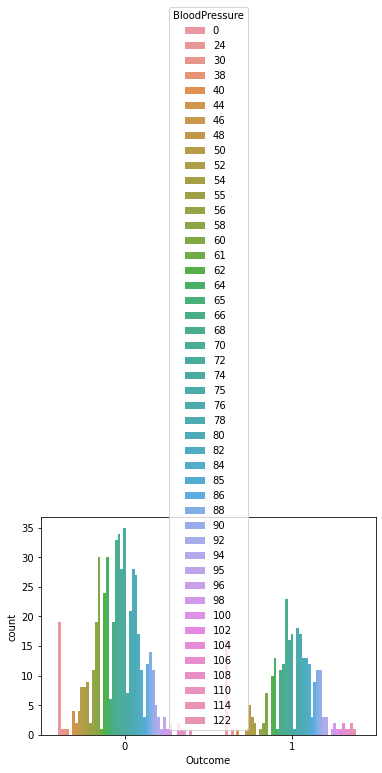

In [10]:
sns.countplot(data=df,x='Outcome',hue='BloodPressure')
plt.show()

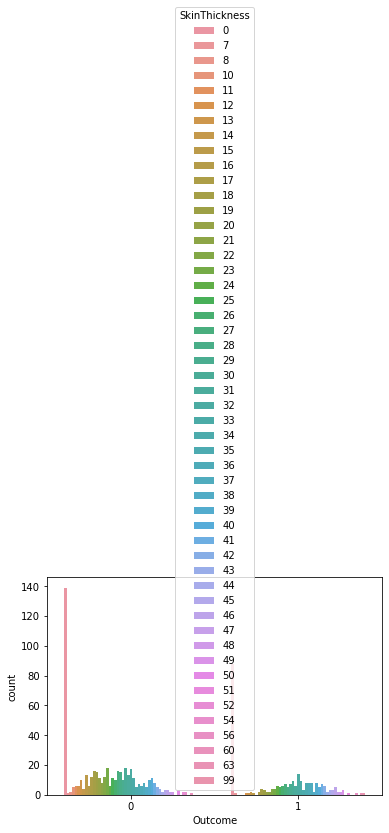

In [11]:
sns.countplot(data=df,x='Outcome',hue='SkinThickness')
plt.show()

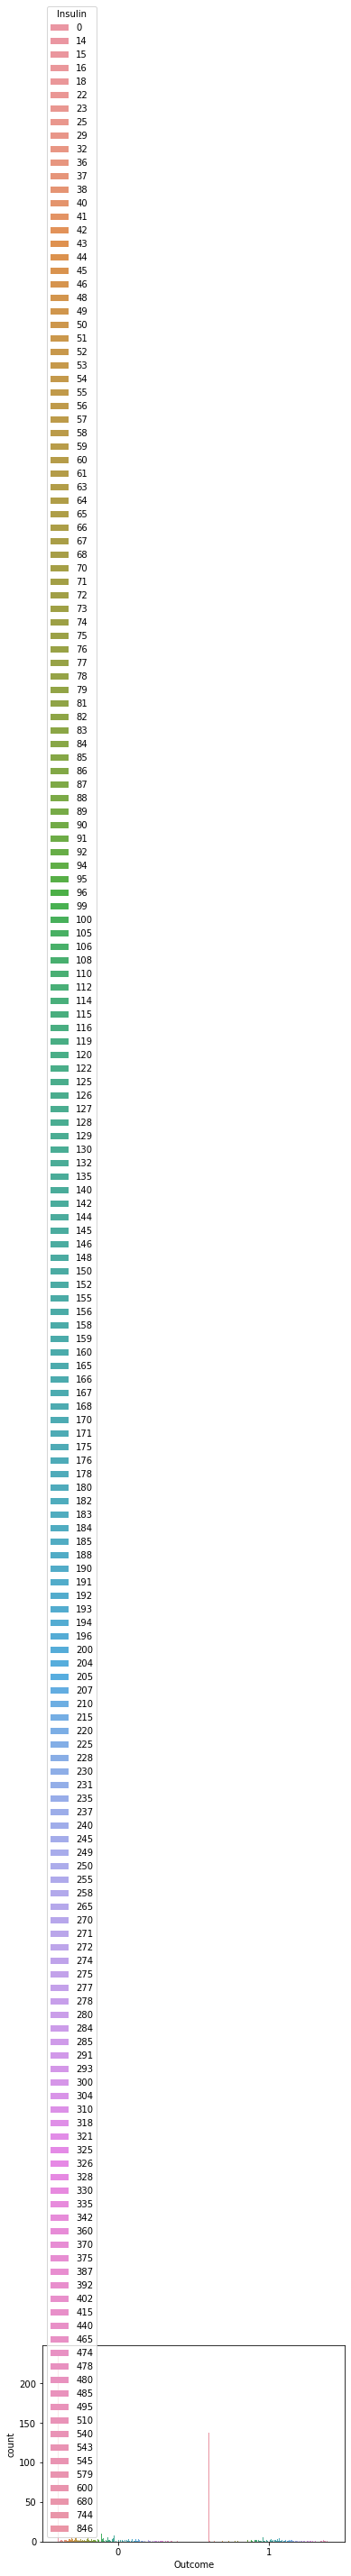

In [12]:
sns.countplot(data=df,x='Outcome',hue='Insulin')
plt.show()

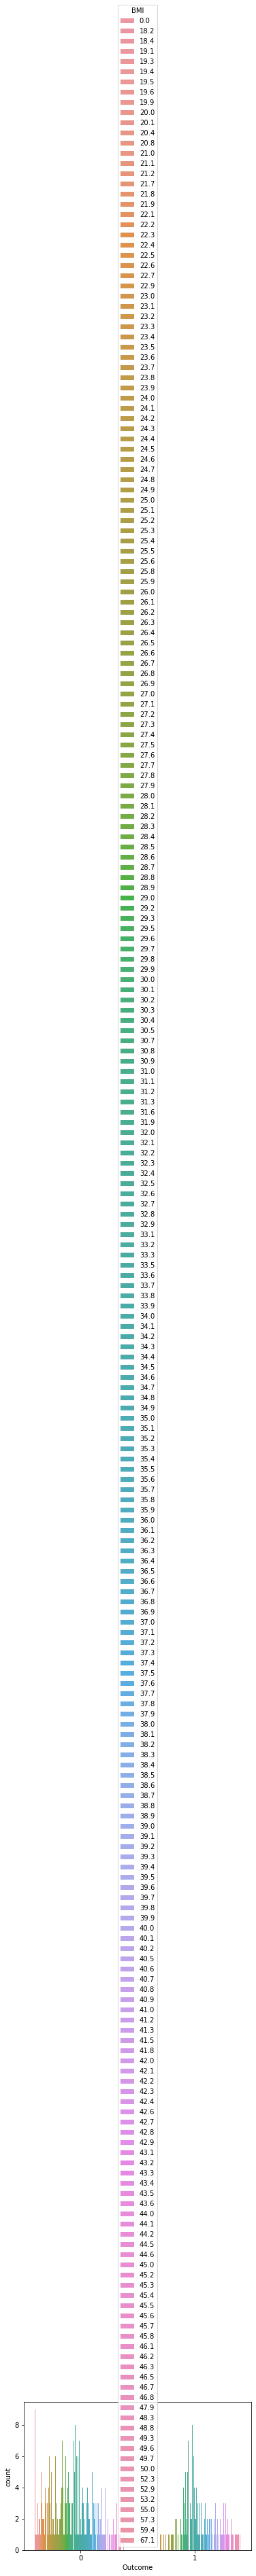

In [13]:
sns.countplot(data=df,x='Outcome',hue='BMI')
plt.show()

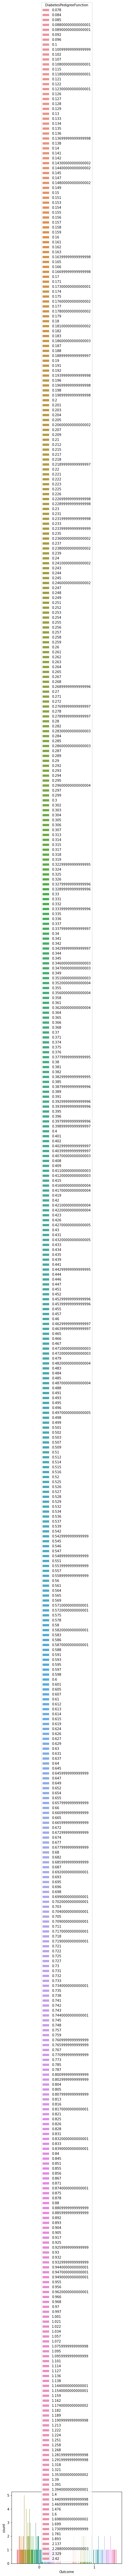

In [14]:
sns.countplot(data=df,x='Outcome',hue='DiabetesPedigreeFunction')
plt.show()

In [15]:
#To check the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
#Now we will separate the independent and dependent variable to train and test the dataset
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [17]:
#sorting dataset for the purpose of training and testing the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
#calling the class for the purpose of checking scores
from sklearn.metrics import classification_report

In [19]:
#function create
def create_model(model):
    model.fit(X_train,Y_train) #we train the model
    y_pred=model.predict(X_test)  #test
    print(classification_report(Y_test,y_pred))
    return model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [22]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



LogisticRegression()

In [23]:
#The score what we have received is less and hence we will try with the decision tree classifier in order to get good recall score 
#for this dataset

In [24]:
#calling the class
from sklearn.tree import DecisionTreeClassifier

In [25]:
#creating object for decision tree classifier
dt=DecisionTreeClassifier()

In [26]:
#call function
create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       146
           1       0.61      0.51      0.55        85

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231



DecisionTreeClassifier()

In [27]:
#Even after using Decision Tree Classifier the score has not increased at required pace.
#first we will check what are the important features

In [28]:
dt.feature_importances_

array([0.03818164, 0.28678596, 0.1574524 , 0.05536493, 0.05607682,
       0.19510086, 0.09913412, 0.11190328])

In [29]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [30]:
#We will create tree for the important features
#And first we need to call the class to draw a tree
from sklearn import tree

In [31]:
features=X.columns

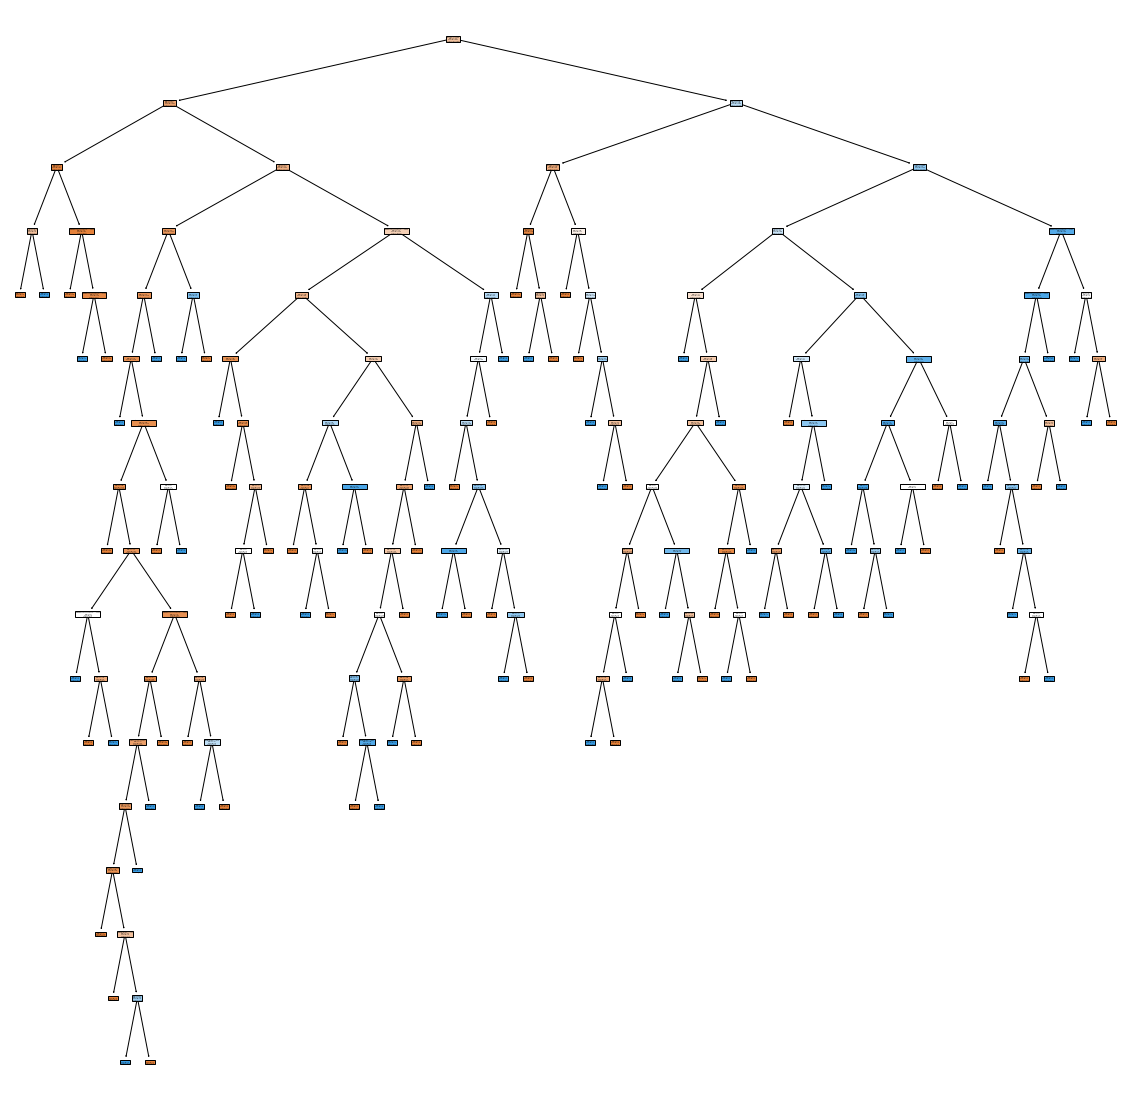

In [32]:
#Create a Tree
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [33]:
#Even after using Decision Tree the model is still overfitted and now to overcome the ovefitted situation we will be using Pruning technique
#where only those features will be taken which are important in order to take decisions

In [35]:
#Using Max_depth parameter
dt1=DecisionTreeClassifier(max_depth=5)  #not more than 8 we can use as per standard process

In [36]:
#call Function
create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.69      0.64      0.66        85

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



DecisionTreeClassifier(max_depth=5)

In [37]:
dt1.feature_importances_

array([0.02790012, 0.41970343, 0.0373188 , 0.01258775, 0.01258775,
       0.2602461 , 0.09604927, 0.13360679])

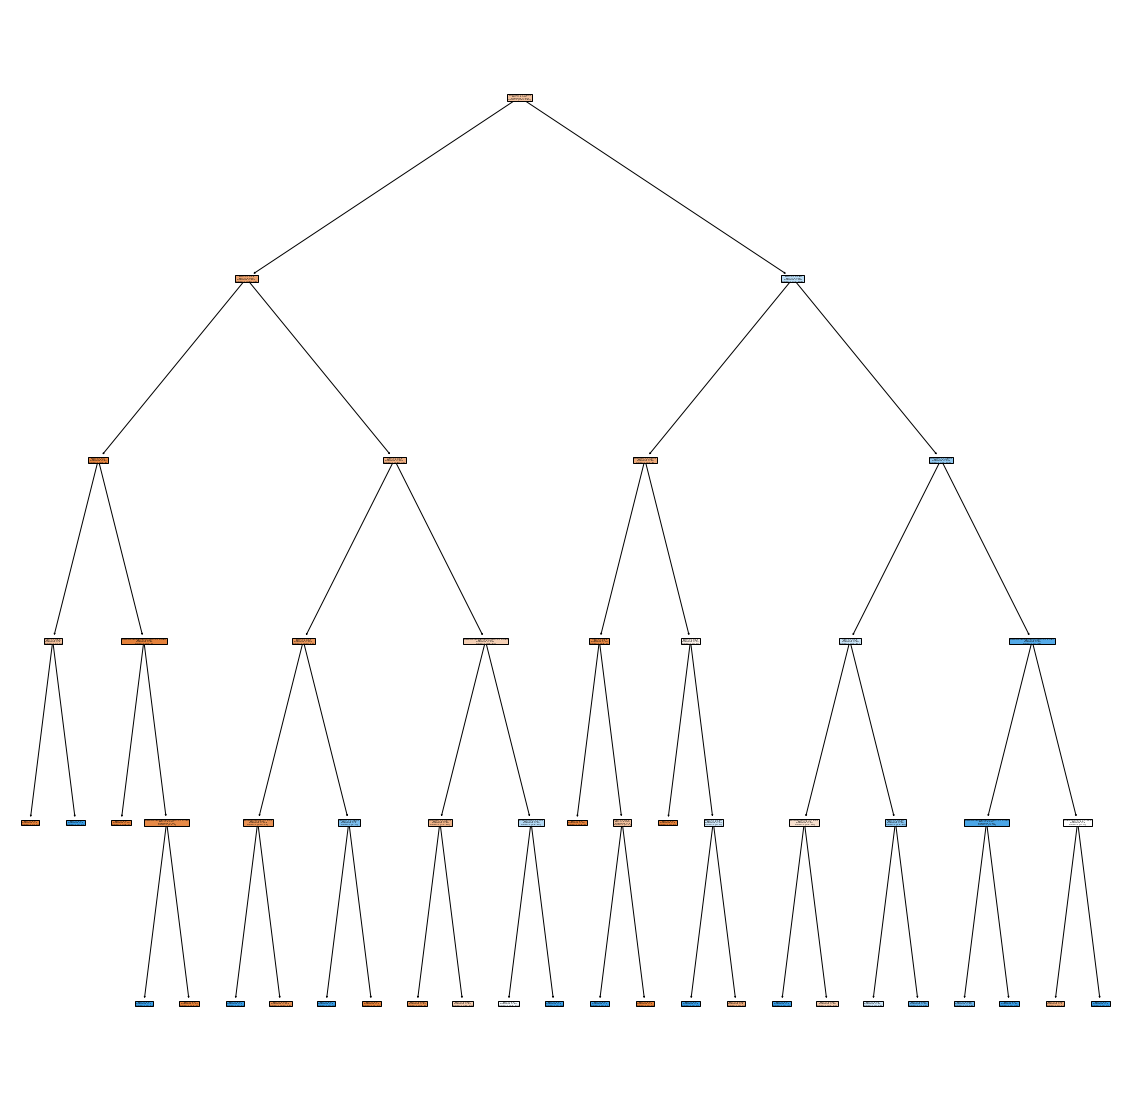

In [39]:
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [40]:
#Using min_samples_leaf parameter
dt2=DecisionTreeClassifier(min_samples_leaf=47) #it should not be more than 50 (leaf node)

In [41]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       146
           1       0.71      0.71      0.71        85

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



In [42]:
#now we will check important features with the help of this parameter
dt2.feature_importances_

array([0.        , 0.56856976, 0.        , 0.        , 0.        ,
       0.27518761, 0.05315756, 0.10308507])

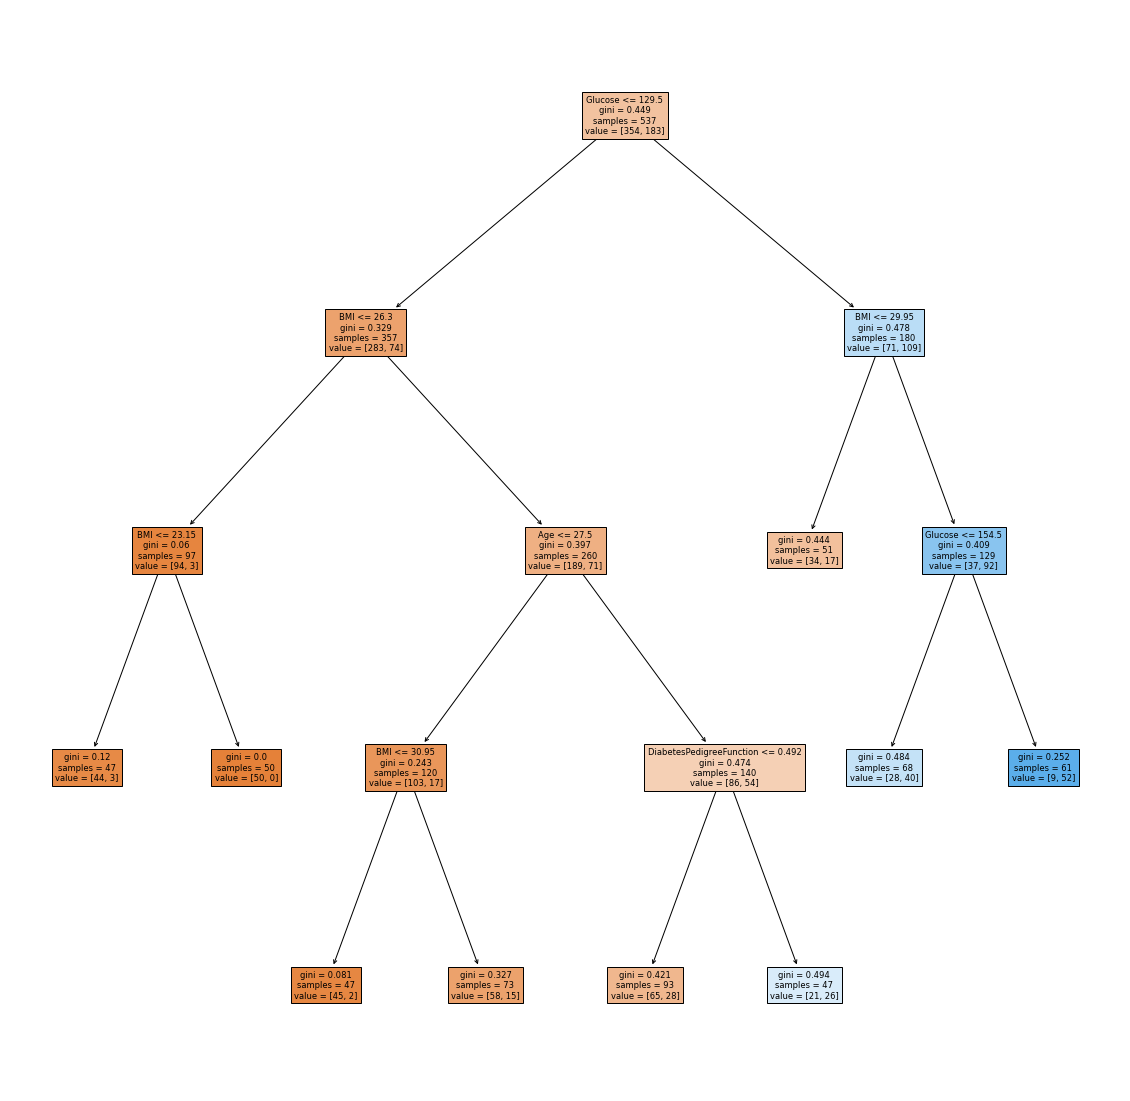

In [43]:
#we will also draw a Decision Tree 
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [44]:
#Still the score is not upto the mark
#Now we will be using Ensembling technique Boosting in order to get a good score

In [46]:
#we will call the class for ada Boosting ensembling technique first
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#object needs to create for AdaBoosting
ad=AdaBoostClassifier()

In [49]:
#call function
create_model(ad)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



AdaBoostClassifier()

In [50]:
#call the class for the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=100)

In [52]:
#call function
create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



GradientBoostingClassifier()

In [53]:
#Even after using ensembling techniques the dataset's score is not getting pulled up
#It shows that the dataset is imbalance and to correct the imbalance datasets we will be using sampling technique

In [54]:
#we will check the number of yes and no means 0 and 1 in the dataset
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
#we will call the class for sampling 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [56]:
#create object of RandomOverSampler() class
ros=RandomOverSampler()

In [57]:
X_sample1,Y_sample1=ros.fit_sample(X_train,Y_train)

In [58]:
pd.Series(Y_train).value_counts()

0    354
1    183
Name: Outcome, dtype: int64

In [59]:
pd.Series(Y_sample1).value_counts()

1    354
0    354
Name: Outcome, dtype: int64

In [60]:
#Now after sampling process,we can use DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=3) #use pruning technique

In [61]:
dt2.fit(X_sample1,Y_sample1) #we train model

DecisionTreeClassifier(max_depth=3)

In [62]:
pd.Series(Y_test).value_counts()

0    146
1     85
Name: Outcome, dtype: int64

In [63]:
X_sample_test,Y_sample_test=ros.fit_sample(X_test,Y_test)

In [64]:
y_pred=dt2.predict(X_sample_test)  #test the model

In [65]:
print(classification_report(Y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71       146
           1       0.70      0.90      0.79       146

    accuracy                           0.76       292
   macro avg       0.78      0.76      0.75       292
weighted avg       0.78      0.76      0.75       292

